In [4]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
import timeseries as ts
import FTSImpl as FTS
import numpy

In [6]:
sarima = ts.TimeSeries((0, 0, 0), (0, 1, 0, 7))

Fecha
2017-01-01      123704
2017-01-02    21209771
2017-01-03    26706072
2017-01-04    29734324
2017-01-05    58392417
Name: Ventas, dtype: int64
Model Fitting Time: 0.03749394416809082
                                SARIMAX Results                                
Dep. Variable:                  Ventas   No. Observations:                  912
Model:             SARIMAX(0, 1, 0, 7)   Log Likelihood                1150.048
Date:                 Sat, 14 Nov 2020   AIC                          -2298.096
Time:                         15:44:33   BIC                          -2293.289
Sample:                     01-01-2017   HQIC                         -2296.260
                          - 07-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        

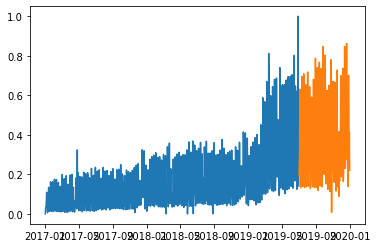

In [49]:
plot(sarima.train_data)
plot(sarima.test_data)

trainMtx = numpy.matrix(sarima.train_data).transpose()
testMtx = numpy.matrix(sarima.test_data).transpose()

In [52]:
# Preparar data para la libreria
train = numpy.array(trainMtx.flatten())[0]
test = numpy.array(testMtx.flatten())[0]

In [53]:
fuzzyTS  = FTS.FuzzyTS(train, 10, 'maximum', 'sets')

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fuzzyTS.fs.plot(ax)
#patterns 
print([str(k) for k in fuzzyTS.patterns])
#model
print(fuzzyTS.model)
#model Plot
#from pyFTS.common import Util
#Util.plot_rules(fuzzyTS.model, size=[15,5] , rules_by_axis=10)

['A0 -> A0', 'A0 -> A1', 'A1 -> A1', 'A1 -> A0', 'A1 -> A2', 'A2 -> A1', 'A0 -> A3', 'A3 -> A1', 'A2 -> A2', 'A2 -> A0', 'A0 -> A2', 'A2 -> A3', 'A3 -> A2', 'A1 -> A3', 'A2 -> A4', 'A4 -> A2', 'A1 -> A4', 'A4 -> A3', 'A2 -> A5', 'A5 -> A4', 'A4 -> A1', 'A3 -> A5', 'A2 -> A6', 'A6 -> A4', 'A3 -> A7', 'A7 -> A6', 'A6 -> A2', 'A6 -> A5', 'A5 -> A2', 'A3 -> A6', 'A3 -> A4', 'A1 -> A7', 'A7 -> A3', 'A1 -> A6', 'A6 -> A6', 'A6 -> A3', 'A3 -> A3', 'A7 -> A7', 'A7 -> A2', 'A4 -> A5', 'A5 -> A1', 'A3 -> A9', 'A9 -> A4']
Conventional FTS:
A0 -> A0,A1,A2,A3
A5 -> A1,A2,A4
A4 -> A1,A2,A3,A5
A2 -> A0,A1,A2,A3,A4,A5,A6
A1 -> A0,A1,A2,A3,A4,A6,A7
A6 -> A2,A3,A4,A5,A6
A9 -> A4
A7 -> A2,A3,A6,A7
A3 -> A1,A2,A3,A4,A5,A6,A7,A9



ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (11).